# A Recursive Parser for Chomsky Normal Form

**Chomsky Normal Form** is a context free grammar with its rules in one of the following forms:
+ A → BC,   or
+ A → a,   or
+ S → ε.

The problem of parsing a sentence given a  grammar in this form is a good case for dynamic programming. Usually bottom-up (non-recursive) solutions are preferred as they are easier to trace with pen and paper. On the other side,  recursive solution can be more elegant and readable (with a little bit of overhead though). Compare the following implementation with the bottom-up version (https://en.wikipedia.org/wiki/CYK_algorithm).

## Optimal substructure
Here the optimal substructure refers to the process of obtaining the solution for a problem by
combining solutions for its subproblems. In this case, we have:  A string $w$ can be generated
from $S$ iff there is a way to split $w$ to $xy$ such that $S \rightarrow XY$ is among the rules and $X$ can
generate $x$ and $Y$ can generate $y$.
### Let’s define our variables first:
+ **R**: The List of the rules. Every r in R is in this form : $A \rightarrow BC$. We save $A$ in $r.lhs$ and $BC$ in $r.rhs$.
+ **w**: The given string
+ **chart**: This is the dycamic programming table. Every entry of it has a list of pairs of `(rule_no, splitting point)`. For example 
`chart[‘abcd’]= [(1,2),(2,3)]` 
means you can generate  this string from rule number 1 if you split it at the 2nd position, or rule no 3 if you split  at position 3.

# Implementing the Parser

We need a simple helper function that can return all the possible ways of splitting the sentence.

In [1]:
def split_string(s):
    """ Returns all the possible ways of splitting a given string.
    
    Args: 
        s: Given string
    Returns: 
        A list of tupples (left_half, right_half)
    """
    
    sl=[(k,s[:k],s[k:]) for k in range(1,len(s))]
    return sl
split_string('works_like_this')    

In [2]:
__author__ = "Armin Sajadi"
__email__ = "sajadi@cs.dal.ca"
__status__ = "Development"

from collections import defaultdict
def start_parser (R, w):
    """ Starts the parser    
    
    Args: 
        R: The list of the rules
        w: Given string
    Returns: 
        chart: The dynamic table with each entry a list of pairs of (rule number, splitting points)
    """
    
    #Create a dictionary (hashtable) with the right side of the rules as the 
    # key and the rule numbers as the values
    R_map=defaultdict(list)
    for (i,r) in enumerate(R):
        R_map[r[1]].append(i)
    chart=defaultdict(list)
    parse(R, R_map,w,chart)
    return chart
def parse(R,R_map,w,chart):
    """ Parses a sentence    
    
    Args: 
        R: The list of the rules.
        R_map: A map from the leftside of the rules to the rule numbers.
        w: given string.
        chart: output variable, the dynamic table with each entry a list of tuples (rule number, splitting points)
    Returns: 
        nothing
    """
    
    if w in chart:
        return chart[w]
    if w in alphabet:
        for r in R_map[w]:
            chart[w].append((r,1))

    for (k,x,y) in split_string(w):
        parse(R,R_map, x, chart)
        parse(R,R_map, y, chart)
        for (r1_index,_),(r2_index,_) in zip(chart[x],chart[y]):
            (v1,_),(v2,_) = R[r1_index], R[r2_index]
            rhs = v1+v2
            for r in R_map[rhs]:
                chart[w].append((r,k))


# Testing The Parser

In [3]:
alphabet={'a','b','c','d'}
R=[('S','AB'),
('S','AA'),
('A','BC'),
('A','a'),
('A','b'),
('B','BA'),
('B','CA'),
('B','c'),
('B','b'),

('C','BB'),
('C','d')]

## You need to install graphviz to run the following code
### Reading the chart
We need to start from `chart[w]` and check if ($S\rightarrow AB$, $k$) is among the rules. If so, we split $w$ using $k$ to two parts, $x$ and $y$. We continue the process for $x$ and $y$ seperatedly, untill we hit a terminal (a lowercase letter, a.k.a alphabet).

In [4]:
# #If graphviz not installed
# !pip install graphviz
# !brew install graphviz

In [5]:
from queue import Queue
from graphviz import Digraph
import graphviz

def generate(R,w,chart):
    """ Draws the parse-tree
    
    Args: 
        R: The list of the rules
        w: Given string
        chart: The dynamic table with each entry a list of pairs of (rule number, splitting points)

    Returns:
        dot: The tree 
    """
    
    q=Queue()
    dot = Digraph(engine='dot')
    
    dot.node('0', 'S')
    
    node_id=0
    q.put((w,'S',node_id))
    string=[]
    while not q.empty():
        w,U,Uid = q.get()
        found = False
        for (r_index,k) in chart[w]:
            if R[r_index][0]==U:
                found = True
                # U --> VW or U --> v
                V = R[r_index][1][0]
                node_id += 1
                dot.node(str(node_id), V)
                dot.edge(str(Uid), str(node_id))
                if len(R[r_index][1]) == 1:
                    break
                q.put((w[:k], V, node_id))
                W = R[r_index][1][1]
                node_id += 1
                dot.node(str(node_id), W)
                dot.edge(str(Uid), str(node_id))
                q.put((w[k:], W, node_id))
                break    
        if not found:
            print (w," and ", U, "not found")
            return None
                    
    return dot


# Testing


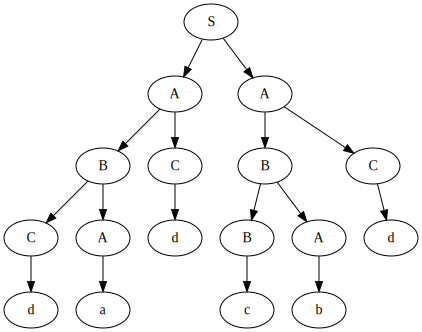

In [6]:
#generate(R,'dadcbd')
sample_str = 'dadcbd'
chart= start_parser(R,sample_str)
dot=generate(R,sample_str,chart)
dot